Setting up

In [262]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import tensorflow as tf
import os
import pandas as pd
from astropy.wcs import WCS
from shutil import copyfile

In [1]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


Renaming fits files

In [447]:
cd ~

/home/ywan


In [498]:
image_list = sorted(os.listdir("image/r_part3"))

In [494]:
photozdata = pd.read_csv('/mnt/data/HSC/HSC_v6/HSC_v6.csv')
photodata = photozdata

In [499]:
fail_list = []

for i in range(len(image_list)):

    
    image = fits.open("image/r_part3/"+image_list[i])
    wcs = WCS(image[1].header) 
    coord = wcs.pixel_to_world_values([58,62],[58,62])  
    coord_ = np.asarray(coord)
    ra2 = coord_[0][0]
    ra1 = coord_[0][1]
    dec1 = coord_[1][0]
    dec2 = coord_[1][1]
    
    filt = (photodata["ra"] < ra2)\
    &(photodata["ra"] > ra1)\
    &(photodata["dec"] < dec2)\
    &(photodata["dec"] > dec1)

    photodata_subset = photodata[filt]
        
    if len(np.asarray(photodata_subset["object_id"])) == 1:
        
        object_id = np.asarray(photodata_subset["object_id"])[0]
        file1 = "image/r_part3/" + image_list[i]
        file2 = "../../data/HSC/HSC_v6/image_renamed/r_band/" + str(object_id) + ".fits"
        
        copyfile(file1,file2)
        
        photodata = photodata.drop(photodata_subset.index)
    
    elif len(np.asarray(photodata_subset["object_id"])) == 2:
        
        object_id = np.asarray(photodata_subset["object_id"])[0]
        file1 = "image/r_part3/" + image_list[i]
        file2 = "../../data/HSC/HSC_v6/image_renamed/r_band/" + str(object_id) + ".fits"
        
        copyfile(file1,file2)
        

        photodata = photodata.drop(photodata_subset.index[0])

    else:
    
        print ("couldn't find corresponding obejct_id for "+image_list[i])
        fail_list.append(i)


In [430]:
len(fail_list)

0

In [404]:
image = fits.open("image/z_part1/10-cutout-HSC-Z-9329-pdr2_wide.fits")
wcs = WCS(image[1].header) 
coord = wcs.pixel_to_world_values([58,62],[58,62])  
coord_ = np.asarray(coord)
ra2 = coord_[0][0]
ra1 = coord_[0][1]
dec1 = coord_[1][0]
dec2 = coord_[1][1]
    
filt = (photozdata["ra"] < ra2)\
&(photozdata["ra"] > ra1)\
&(photozdata["dec"] < dec2)\
&(photozdata["dec"] > dec1)


photozdata_subset = photozdata[filt]
photozdata_subset

,object_id,specz_redshift_err,specz_redshift,specz_mag_i,specz_name,specz_ra,specz_dec,specz_flag_homogeneous,ra,dec,...,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,g_cmodel_magsigma,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,y_cmodel_magsigma
8,41030230600585935,0.00004,0.18407,16.681,DEEP3-201701-11014487,152.26579,-0.171166,True,152.265779,-0.171195,...,18.542587,17.36076,16.838406,16.513859,16.336201,0.000855,0.000444,0.000268,0.000372,0.000599


g_band


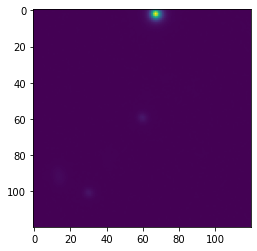

r_band


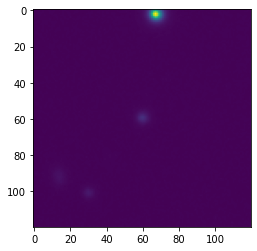

i_band


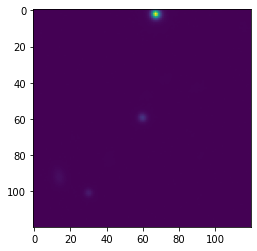

z_band


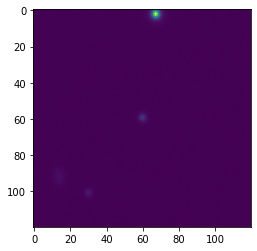

y_band


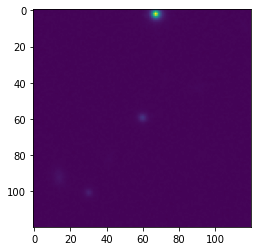

In [513]:
image_g = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/43101989680186426.fits")
image_data_g = image_g[1].data
print("g_band")
plt.imshow(image_data_g)
plt.show()
image_g.close()

image_r = fits.open("../../data/HSC/HSC_v6/image_renamed/r_band/43101989680186426.fits")
image_data_r = image_r[1].data
print("r_band")
plt.imshow(image_data_r)
plt.show()
image_r.close()

image_i = fits.open("../../data/HSC/HSC_v6/image_renamed/i_band/43101989680186426.fits")
image_data_i = image_i[1].data
print("i_band")
plt.imshow(image_data_i)
plt.show()
image_i.close()

image_z = fits.open("../../data/HSC/HSC_v6/image_renamed/z_band/43101989680186426.fits")
image_data_z = image_z[1].data
print("z_band")
plt.imshow(image_data_z)
plt.show()
image_z.close()

image_y = fits.open("../../data/HSC/HSC_v6/image_renamed/y_band/43101989680186426.fits")
image_data_y = image_y[1].data
print("y_band")
plt.imshow(image_data_y)
plt.show()
image_y.close()